## send data to plotter to draw patterns and images

In [1]:
import urllib.request
from time import sleep

import socket
socket.setdefaulttimeout(60)
url = "http://192.168.0.5"

def sendPOST(data,url):
    #data = urllib.parse.urlencode(data).encode()
    req =  urllib.request.Request(url, data=data)
    resp = urllib.request.urlopen(req).read()
    return resp.decode("utf-8")

def sendGET(url):
    resp = urllib.request.urlopen(url).read()
    return resp.decode("utf-8")

In [2]:
#zero position
print( sendPOST(b'0-0;',url) )

ack


In [3]:
#diagonal line
print( sendPOST(b'0-0;1000-300;0-0;',url) )

ack


In [4]:
#quadrat
print( sendPOST(b'0-0;0-300;1000-300;1000-0;0-0;',url) )

ack


In [5]:
#chess board
print( sendPOST(b'0-0;0-300;1000-300;1000-0;0-0;',url) )
print( sendPOST(b'0-0;0-50;50-50;50-0;100-0;100-50;150-50;150-0;200-0;200-50;250-50;250-0;300-0;300-50;350-50;350-0;400-0;400-50;450-50;450-0;500-0;500-50;550-50;550-0;600-0;600-50;650-50;650-0;700-0;700-50;750-50;750-0;800-0;800-50;850-50;850-0;900-0;900-50;950-50;950-0;1000-0;',url) )
print( sendPOST(b'0-100;0-150;50-150;50-100;100-100;100-150;150-150;150-100;200-100;200-150;250-150;250-100;300-100;300-150;350-150;350-100;400-100;400-150;450-150;450-100;500-100;500-150;550-150;550-100;600-100;600-150;650-150;650-100;700-100;700-150;750-150;750-100;800-100;800-150;850-150;850-100;900-100;900-150;950-150;950-100;1000-100;',url) )
print( sendPOST(b'0-200;0-250;50-250;50-200;100-200;100-250;150-250;150-200;200-200;200-250;250-250;250-200;300-200;300-250;350-250;350-200;400-200;400-250;450-250;450-200;500-200;500-250;550-250;550-200;600-200;600-250;650-250;650-200;700-200;700-250;750-250;750-200;800-200;800-250;850-250;850-200;900-200;900-250;950-250;950-200;1000-200;',url) )
print( sendPOST(b'0-0;',url) )

ack
ack
ack
ack
ack


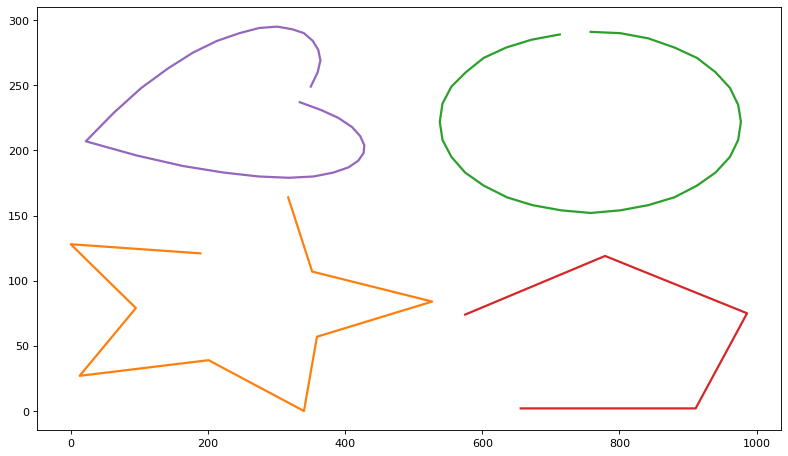

In [40]:
#image
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

scale_x = 1000/4095
scale_y = 300/4095

#plot
fig, ax = plt.subplots(1, figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')

data = str()
xx = [0]
yy = [0]
counter = 0
#length = 0

#parse data and scale it
with open('graphic.hpgl') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for parsed in csv_reader:
        for line in parsed:
            if line[0]=='P' and len(line)>2:
                val = line[2:].split(',')
                while val:
                    x = int(int(val.pop())*scale_x)
                    y = int(int(val.pop())*scale_y)
                    #print(x,y)

                    #as long as pen is down: append values to xx,yy,data
                    if line[1]=='D':
                        xx.append(x)
                        yy.append(y)

                        data += ( str(x)+'-'+str(y)+';' )
                    
                    #if pen goes up -> segment end: send sequence to be drawn
                    #also plot it for visualization
                    if line[1]=='U':

                        ax.plot(xx,yy, linewidth=2)
                        xx = []
                        yy = []
                        xx.append(x)
                        yy.append(y)

                        
                        ###send###
                        sendPOST( data.encode('utf-8') , url )
                        data = str()
                        data += ( str(x)+'-'+str(y)+';' )
                        ###send###

                    counter +=1

#plot last line
ax.plot(xx,yy, linewidth=2)
xx = []
yy = []

###send###
sendPOST( data.encode('utf-8') , url )
data = str()
###send###

plt.show()

In [153]:
### find ip's with open port 80
import socket

def connect(hostname, port):
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    socket.setdefaulttimeout(1)
    result = sock.connect_ex((hostname, port))
    sock.close()
    return result == 0

ip = "192.168.0."
port = 80

for i in range(0,1+255):
    res = connect(ip+str(i), port)
    if res:
        print("Device found at: " + ip + str(i) + ":" + str(port))


Device found at: 192.168.0.1:80
Device found at: 192.168.0.7:80
